In [63]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
def read(indir):
    df = pd.read_csv(os.path.join(indir, "losses.txt"), sep="\t", header=0)
    df["distribution"] = df["distribution"].str.replace("static", "baseline")
    df["normalisation"]
    df.sort_values(by=["distribution"], inplace=True)
    # df.loc[df["exclude_highly_expressed"], "normalisation"] += "-x"
    df = df[~df["exclude_highly_expressed"]]
    df.sort_values(by=["normalisation", "distribution"], ascending=[False, True], inplace=True)
    return df

def plot(df, var, path=None, figsize=(6, 3), dpi=200, legend=False):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    sns.barplot(
        df,
        x="normalisation",
        y=var,
        hue="distribution",
        ax=ax,
    )

    ax.set_xlabel("Normalisation")
    ax.set_ylabel(var.upper())
    if legend:
        leg = plt.legend(bbox_to_anchor=(0.5, 1.1), loc="upper center", borderaxespad=0.0, ncols=5)
        for line in leg.get_lines():
            line.set_linewidth(3.0)
    else:
        ax.get_legend().remove()

    if path is not None:
        plt.savefig(path, bbox_inches='tight')

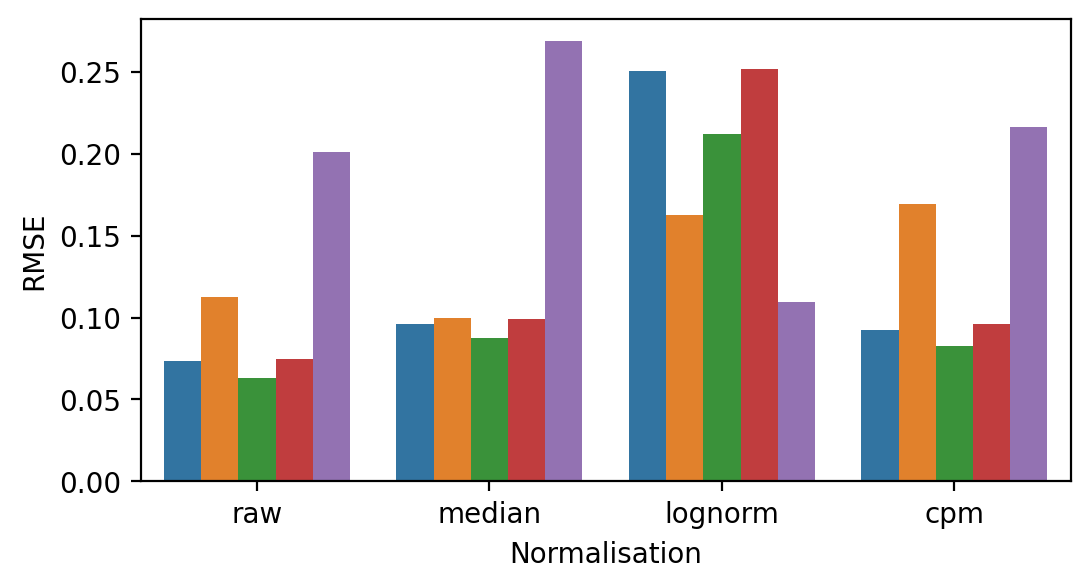

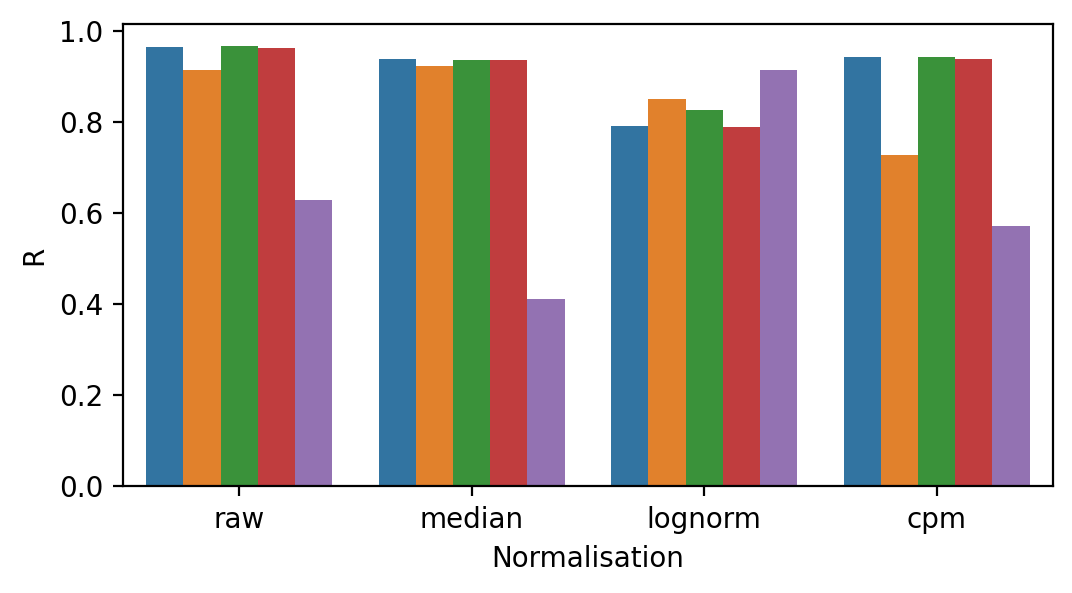

In [90]:
df = read("norm_xin")
plot(df, "rmse", path="figures/norm/rmse_xin.pdf")
plot(df, "r", path="figures/norm/r_xin.pdf")

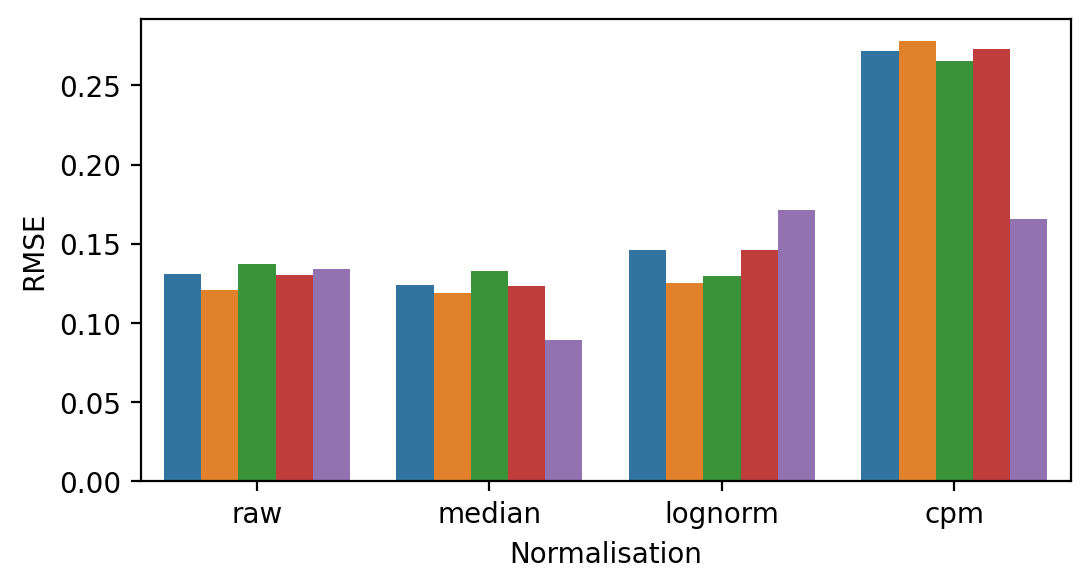

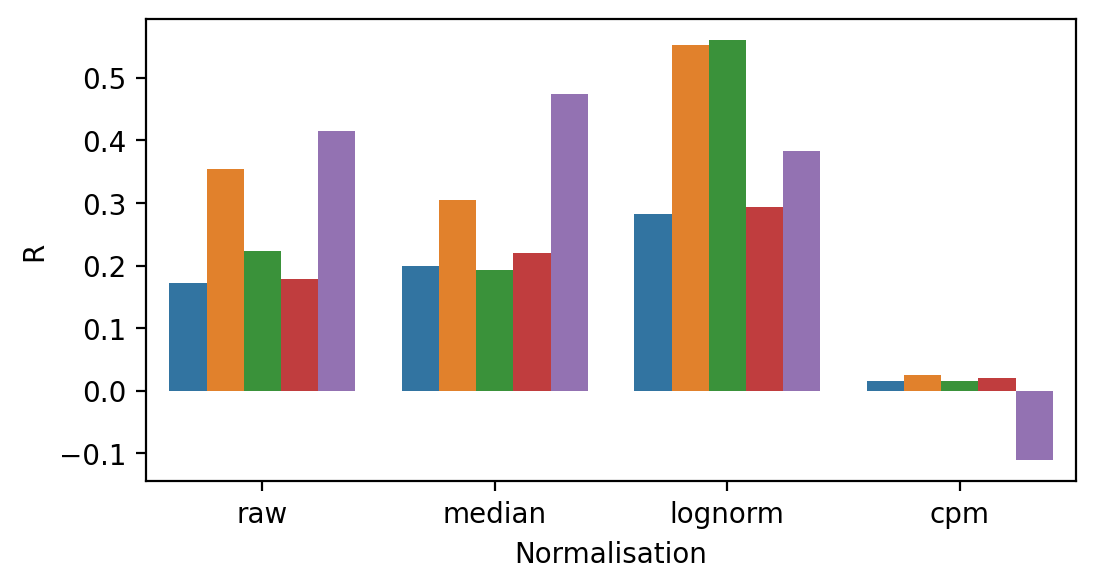

In [91]:
df = read("norm_pbmc")
plot(df, "rmse", path="figures/norm/rmse_pbmc.pdf")
plot(df, "r", path="figures/norm/r_pbmc.pdf")